# Graphical exploratory analysis

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines

In [2]:
df_swing = pd.read_csv("datasets/st1/2008_swing_states.csv")
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [3]:
interested = df_swing[["state", "county", "dem_share"]]
interested.head()

,state,county,dem_share
0,PA,Erie County,60.08
1,PA,Bradford County,40.64
2,PA,Tioga County,36.07
3,PA,McKean County,41.21
4,PA,Potter County,31.04


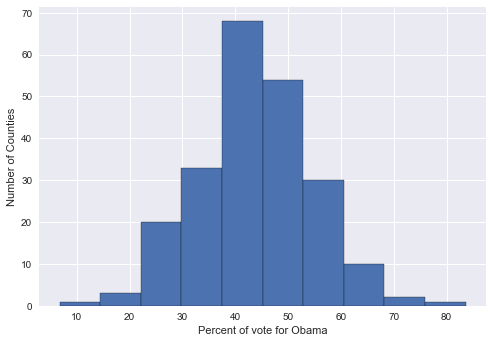

In [4]:
_ = plt.hist(df_swing["dem_share"])
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

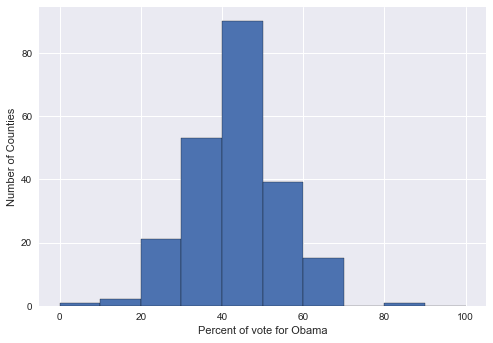

In [5]:
bin_edges = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100]

_ = plt.hist(df_swing["dem_share"], bins = bin_edges)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

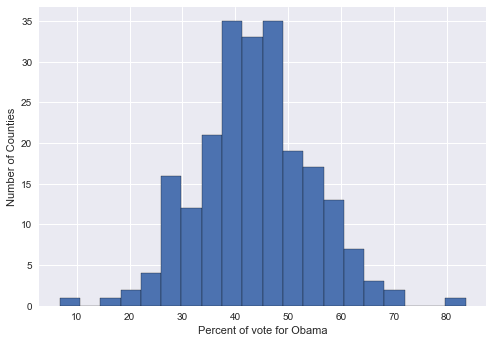

In [6]:
_ = plt.hist(df_swing["dem_share"], bins = 20)
_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("Number of Counties")
plt.show()

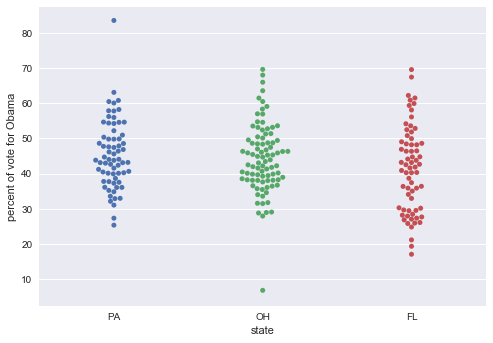

In [7]:
_ = sns.swarmplot(x = "state", y = "dem_share", data = df_swing)
_ = plt.xlabel("state")
_ = plt.ylabel("percent of vote for Obama")
plt.show()

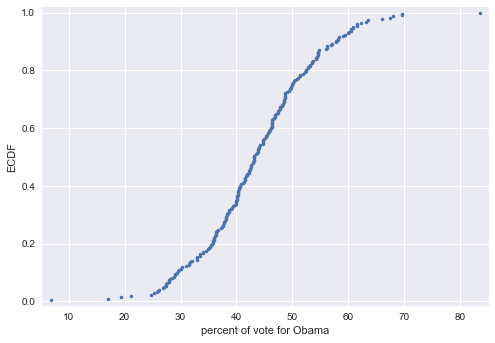

In [8]:
# Empirical cumulative distribution function (ECDF)
# 20% of counties had 36% or less vote for Obama
# 75% of counties had less than half vote for Obama

x = np.sort(df_swing["dem_share"])
y = np.arange(1, len(x) + 1) / len(x)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.xlabel("percent of vote for Obama")
_ = plt.ylabel("ECDF")
plt.margins(0.02) # keeps the data off plot edges
plt.show()

In [9]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

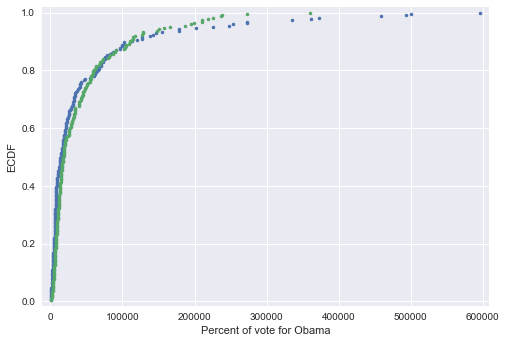

In [10]:
# dem_votes
# rep_votes

x1, y1 = ecdf(df_swing["dem_votes"])
x2, y2 = ecdf(df_swing["rep_votes"])

_ = plt.plot(x1, y1, marker = ".", linestyle = "none")
_ = plt.plot(x2, y2, marker = ".", linestyle = "none")

_ = plt.xlabel("Percent of vote for Obama")
_ = plt.ylabel("ECDF")

plt.margins(0.02)
plt.show()

# Quantitative exploratory analysis

In [11]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set()

In [12]:
df_swing.head()

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64
2,PA,Tioga County,17984,6390,11326,36.07
3,PA,McKean County,15947,6465,9224,41.21
4,PA,Potter County,7507,2300,5109,31.04


In [13]:
dem_share_PA = df_swing[df_swing["state"] == "PA"]["dem_share"]

In [14]:
np.mean(dem_share_PA)

45.476417910447765

In [15]:
np.median(dem_share_PA)

44.030000000000001

The median is the 50th percentile in the ECDF. The 50th percentile is greater than 50% of the datapoints. 

In [16]:
np.percentile(df_swing["dem_share"], [25, 50, 75])

array([ 37.3025,  43.185 ,  49.925 ])

## Boxplots

IQR = Interquartile range (middle 50% of the data). Whisker extends 1.5 IQR. While there is no single definition for an outlier, being more than 2 IQR is a common criteria.

In [17]:
df_all_states = pd.read_csv("datasets/st1/2008_all_states.csv")
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


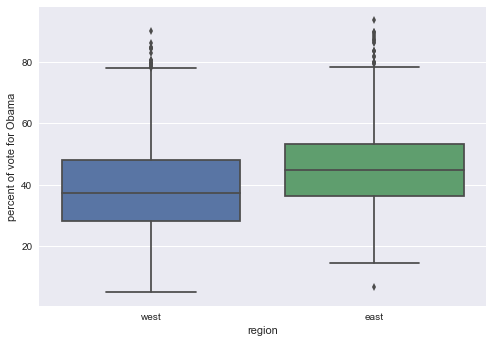

In [18]:
_ = sns.boxplot(x = "east_west", y = "dem_share", data = df_all_states)
_ = plt.xlabel("region")
_ = plt.ylabel("percent of vote for Obama")

plt.show()

In [19]:
np.var(dem_share_PA)

94.66503492982848

In [20]:
np.std(dem_share_PA)

9.729595825615187

In [21]:
difference = dem_share_PA - np.mean(dem_share_PA)
diff_sq = difference ** 2
variance_explicit = np.mean(diff_sq)

variance_np = np.var(dem_share_PA)

print(variance_explicit)
print(variance_np)

94.66503492982848
94.66503492982848


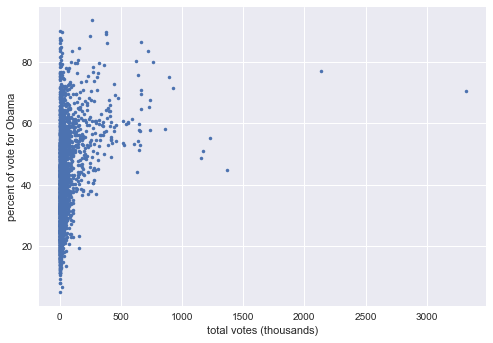

In [22]:
total_votes = df_all_states["total_votes"]
dem_share = df_all_states["dem_share"]

_ = plt.plot(total_votes / 1000, dem_share, marker = ".", linestyle = "none")
_ = plt.xlabel("total votes (thousands)")
_ = plt.ylabel("percent of vote for Obama")

plt.show()

In [23]:
df_all_states.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


In [24]:
demVotes = df_all_states["dem_votes"]
repVotes = df_all_states["rep_votes"]

In [25]:
covariance_matrix = np.cov(demVotes, repVotes)
covariance_matrix

array([[  5.88028888e+09,   2.97471185e+09],
       [  2.97471185e+09,   1.98956688e+09]])

In [26]:
covariance_matrix[0, 1]

2974711848.0903335

In [27]:
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

In [28]:
r = pearson_r(demVotes, repVotes)
print(r)

0.869693654405


## Thinking probabilistically-- Discrete variables

Statistical inference rests upon probability. Because we can very rarely say anything meaningful with absolute certainty from data, we use probabilistic language to make quantitative statements about data. Discrete quantities are those that can only take certain values, like integers. It is an important first step in building the probabilistic language necessary to think statistically.

In [29]:
np.random.seed(88)

In [30]:
random_numbers = np.random.random(size = 4)
random_numbers

array([ 0.64755105,  0.50714969,  0.52834138,  0.8962852 ])

In [31]:
heads = random_numbers < 0.5
heads

array([False, False, False, False], dtype=bool)

In [32]:
np.sum(heads)

0

In [33]:
n_all_heads = 0

In [34]:
for _ in range(10000):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        n_all_heads += 1

In [35]:
n_all_heads / 10000

0.064

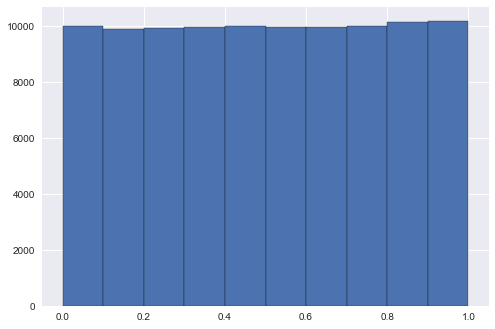

In [36]:
random_numbers = np.empty(100000)

for i in range(len(random_numbers)):
    random_numbers[i] = np.random.random()
    
_ = plt.hist(random_numbers)
plt.show()

In [37]:
def perform_bernoulli_trials(n, p):
    n_success = 0
    
    for i in range(n):
        random_number = np.random.random()
        
        if random_number < p:
            n_success += 1
            
    return n_success

In [38]:
perform_bernoulli_trials(1000, .80)

801

Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function.

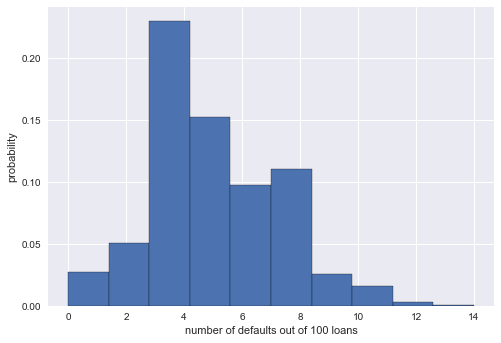

In [39]:
n_defaults = np.empty(1000)

for i in range(len(n_defaults)):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)
    
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel("number of defaults out of 100 loans")
_ = plt.ylabel("probability")
plt.show()

### Binomial distribution:

The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed...

Example: The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed

In [40]:
np.random.binomial(4, 0.5)

4

In [41]:
np.random.binomial(4, 0.5, size = 10)

array([2, 0, 2, 2, 2, 3, 2, 1, 4, 1])

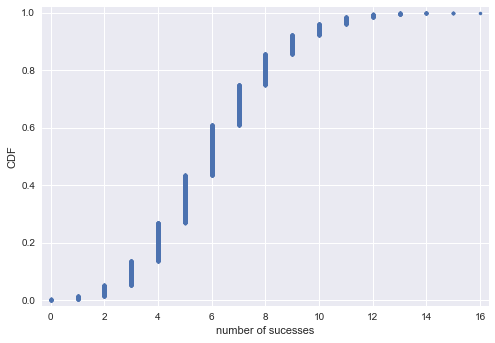

In [42]:
samples = np.random.binomial(60, 0.1, size = 10000)

x, y = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
plt.margins(0.02)

_ = plt.xlabel("number of sucesses")
_ = plt.ylabel("CDF")

plt.show()

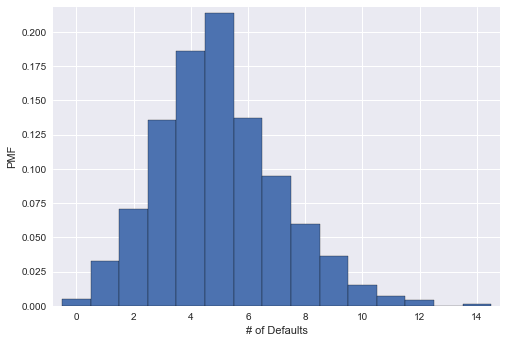

In [43]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

_ = plt.hist(n_defaults, bins = bins, normed = True)
plt.margins(0.02)

_ = plt.xlabel("# of Defaults")
_ = plt.ylabel("PMF")
plt.show()

### Poisson distribution

The number r of arrivals of a Poisson process in a given time interval with average rate of lambda arrivals per interval is Poisson distributed. 

Example: The number r of hits on a website in 1 hour with an average hit rate of 6 hits per hour is Poisson distributed. 

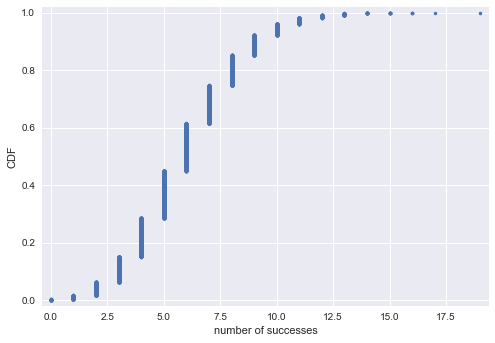

In [44]:
samples = np.random.poisson(6, size = 10000)
x, y = ecdf(samples)

_ = plt.plot(x, y, marker = ".", linestyle = "none")
plt.margins(0.02)

_ = plt.xlabel("number of successes")
_ = plt.ylabel("CDF")

plt.show()

### Relationship between Binomial and Poisson distributions
You just heard that the Poisson distribution is a limit of the Binomial distribution for rare events. This makes sense if you think about the stories. Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story we discussed in the video, where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to np approximates a Binomial distribution for n Bernoulli trials with probability p of success (with n large and p small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

In [45]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson((251/115), size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0065


## Thinking probabilistically-- Continuous variables

Now it is time to move on to continuous variables, such as those that can take on any fractional value. Many of the principles are the same, but there are some subtleties. At the end of this last chapter of the course, you will be speaking the probabilistic language you need to launch into the inference techniques covered in the sequel to this course.

In [46]:
light = pd.read_csv("datasets/st1/michelson_speed_of_light.csv")
light.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,5-Jun,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.1,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.5,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


In [47]:
speed_of_light = light["velocity of light in air (km/s)"]
speed_of_light.head()

0    299850
1    299740
2    299900
3    300070
4    299930
Name: velocity of light in air (km/s), dtype: int64

In [48]:
mean = np.mean(speed_of_light)
std = np.std(speed_of_light)

samples = np.random.normal(mean, std, size = 10000)

In [49]:
x, y = ecdf(speed_of_light) # get the ecdf of the data
x_theory, y_theory = ecdf(samples) # get the ecdf of the theoretical data 

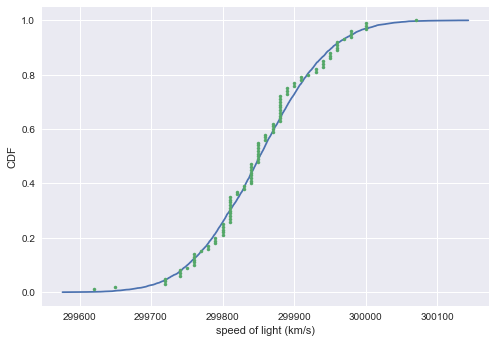

In [50]:
_ = plt.plot(x_theory, y_theory)
_ = plt.plot(x, y, marker = ".", linestyle = "none")
_ = plt.xlabel("speed of light (km/s)")
_ = plt.ylabel("CDF")
plt.show()

# we're comparing the CDF to check whether the data is normally distributed.
# CDFs are better than PDFs when checking for normality because there is no binning bias. 

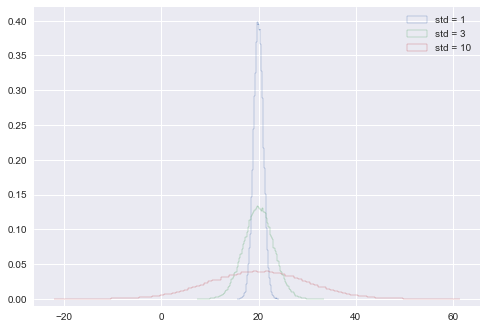

In [51]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10

samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
_ = plt.hist(samples_std1, normed = True, histtype = "step", bins = 100)
_ = plt.hist(samples_std3, normed = True, histtype = "step", bins = 100)
_ = plt.hist(samples_std10, normed = True, histtype = "step", bins = 100)


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


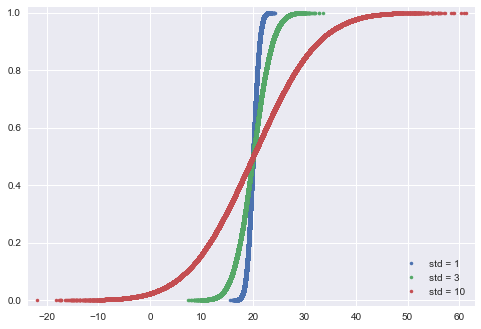

In [52]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)



# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker = ".", linestyle = "none")
_ = plt.plot(x_std3, y_std3, marker = ".", linestyle = "none")
_ = plt.plot(x_std10, y_std10, marker = ".", linestyle = "none")


# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


### Normal distribution warnings

* Compare the data distribution with the ECDF of the theoretical normal distribution. 
* Keep in mind the lightness of the tails. Real datasets usually have outliers though so keep that in mind. 

### Exponential distributions

We know that the number of buses that arrive per house is poisson distributed but the amount of time between arrivals is exponentially distributed. 

* The waiting time between arrivals of a Poisson process is exponentially distributed. 

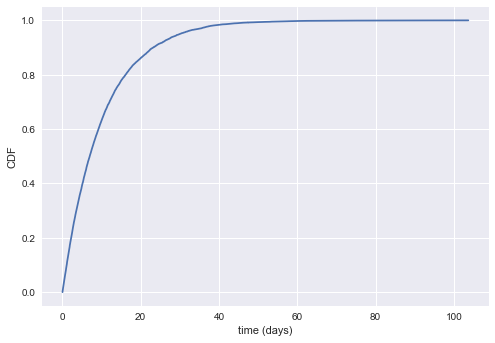

In [53]:
samples = np.random.exponential(10, size = 10000)
x_theory, y_theory = ecdf(samples)

_ = plt.plot(x_theory, y_theory)
_ = plt.xlabel("time (days)")
_ = plt.ylabel("CDF")

plt.show()

## If you have a story, you can simulate it!
Sometimes, the story describing our probability distribution does not have a named distribution to go along with it. In these cases, fear not! You can always simulate it